## Tannis McCartney
## May 25, 2022

### This notebook conducts visualizations on the orders and products merged datset, including the newly derived and aggragated columns

## Contents:
### 01 Import libraries
### 02 Import data
### 03 Create and export bar charts
### 04 Creating and export histogram and scatterplot
### 05 Sampling data
### 06 Create and export line chart
### 07 Create an order_hour_of_day histogram
### 08 Create a bar chart from the loyalty_flag column
### 09 Create a line chart showing expenditure vs hour of day

# 01 Import libraries

In [1]:
# Import libraries for analysis and visualization
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import data

In [2]:
# Turn project folder path into a string
path = r'C:\Users\tmmcc\Google Drive\Data Analytics Bootcamp\4 Python Fundamentals for Data Analysts\05-2022 Instacart Basket Analysis'

In [3]:
# Import merged orders and products data (including new columns)
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_derived_aggregated.pkl'))
df_ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,price_range,busiest_day,busiest_2_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_days_since_order,order_frequency
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New Customer,6.37,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New Customer,6.37,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New Customer,6.37,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Mid-range product,Least busy,Slowest days,Average orders,10,New Customer,6.37,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,Mid-range product,Least busy,Slowest days,Most orders,10,New Customer,6.37,Low spender,20.5,Non-frequent customer


In [4]:
# Check shape of df_ords_prods_merge
df_ords_prods_merge.shape

(32433030, 24)

# 03 Creating and export bar charts

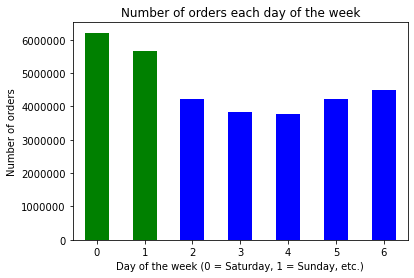

In [113]:
# Create a bar chart for the orders_day_of_the_week column
bar = df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(
    color = ['green', 'green', 'blue', 'blue', 'blue', 'blue', 'blue'], 
    title = "Number of orders each day of the week",
    xlabel = "Day of the week (0 = Saturday, 1 = Sunday, etc.)",
    ylabel = "Number of orders")
bar.tick_params(axis='x', rotation=0)
bar.ticklabel_format(useOffset=False, style='plain', axis='y')

#### The green bars are the weekend, the blue bars are the weekdays. More orders are placed on weekends than during the week.

In [114]:
# Export bar object created in previous step
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '01-bar_orders_dow.png'))

# 04 Create and export histograms and scatterplots

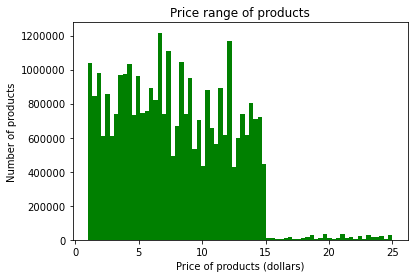

In [115]:
# Create a histogram of the "prices column"
hist = df_ords_prods_merge['prices'].plot.hist(
    bins=70, 
    color = ['green'],
    title = "Price range of products")
hist.set_xlabel("Price of products (dollars)")
hist.set_ylabel("Number of products")
hist.ticklabel_format(useOffset=False, style='plain', axis='y')

#### The fix for the two very high prices was moved to the notebook on data checks. The histogram shows that most products are 15 dollars or less. The maximum product price is 25 dollars.

In [117]:
# Export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '02-hist_prices.png'), bbox_inches='tight')

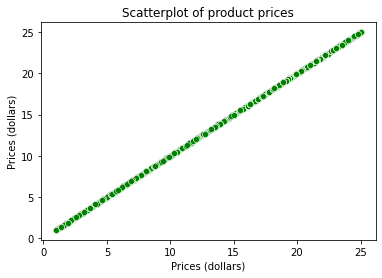

In [56]:
# Create a scatterplot of the "prices" column
scatter = sns.scatterplot(
    x = 'prices',
    y = 'prices',
    data = df_ords_prods_merge,
    color=['green']).set(title='Scatterplot of product prices', xlabel='Prices (dollars)', ylabel='Prices (dollars)')

#### The scatterplot shows that the anaomalously high prices, which were changed to NaN, are not skewing the data. The price range is 0-25 dollars.

In [119]:
# Export scatter object 
scatter[1].figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '03-scatter_prices.png'))

# 05 Sampling data

In [59]:
# Create the random samples
np.random.seed(4)

In [60]:
# Create a boolean test for np.random.rand() 
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7
dev

array([False,  True, False, ...,  True, False,  True])

In [61]:
# Check length of dev
len(dev)

32433030

In [63]:
# Store 30% of samples in small dataframe
small = df_ords_prods_merge[~dev]

In [64]:
# Check statistics of small
small.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_prices,median_days_since_order
count,9.729386e+06,9.729386e+06,9.729386e+06,9.729386e+06,9.729386e+06,9107008.0,9.729386e+06,9.729386e+06,9.729386e+06,9.729386e+06,9.729386e+06,9.727816e+06,9.729386e+06,9.729386e+06,9729386.0
mean,1.710331e+06,1.029160e+05,1.714599e+01,2.739678e+00,1.342404e+01,NaN,2.557620e+04,8.351096e+00,5.898280e-01,7.121338e+01,9.925869e+00,7.814311e+00,3.305439e+01,7.911092e+00,NaN
std,9.872479e+05,5.945863e+04,1.752835e+01,2.090527e+00,4.246662e+00,0.0,1.409624e+04,7.123877e+00,4.918648e-01,3.820736e+01,6.281161e+00,4.212772e+00,2.514795e+01,7.373279e-01,0.0
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,0.0
25%,8.554780e+05,5.140900e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.0,1.353500e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.380000e+00,6.0
50%,1.710292e+06,1.025940e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.0,2.524600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.820000e+00,8.0
75%,2.565022e+06,1.543638e+05,2.400000e+01,5.000000e+00,1.600000e+01,15.0,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.230000e+00,13.0
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,30.0,4.968800e+04,1.430000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.000000e+01,30.0


In [67]:
# Check size of small compared to original dataframe
len(small)/len(df_ords_prods_merge)

0.29998387446377967

#### The length of small is 30% of the length of df_ords_prods_merge

In [69]:
# Reduce samples to only columns needed for the chart (to speed up)
df_2 = small[['orders_day_of_week', 'prices']]
df_2.tail(10)

,orders_day_of_week,prices
32432997,6,2.8
32433002,0,8.7
32433005,1,10.2
32433007,4,10.3
32433008,5,2.6
32433009,1,2.6
32433015,4,3.7
32433018,4,3.7
32433020,3,3.7
32433028,3,6.9


# 06 Create and export line chart

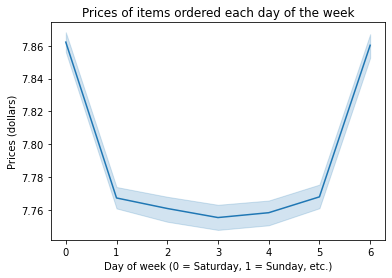

In [70]:
# Create line chart of small dataframe
line_order_dow = sns.lineplot(
    data = df_2,
    x = 'orders_day_of_week',
    y = 'prices').set(title='Prices of items ordered each day of the week', xlabel='Day of week (0 = Saturday, 1 = Sunday, etc.)', ylabel='Prices (dollars)')

#### This doesn't look like the example, but I've checked my code and I think this is what my data looks like. I suspect that the random array is different: when I looked at dev, it did not match dev in the example. However, it does show that more money is spent on Friday and Saturday.

In [120]:
# Export line chart
line_order_dow[1].figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '04-line_prices_day_of_week.png'))

# 07 Create an order_hour_of_day histogram

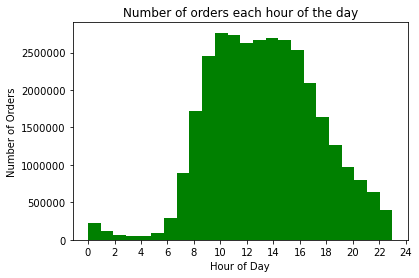

In [132]:
# Create a histogram of the order_hour_of_day column
from matplotlib import ticker
hist2 = df_ords_prods_merge['order_hour_of_day'].plot.hist(
    bins=24,
    color = ['green'],
    title = "Number of orders each hour of the day")
hist2.set_xlabel('Hour of Day')
hist2.set_ylabel('Number of Orders')
hist2.ticklabel_format(useOffset=False, style='plain', axis='y')
hist2.xaxis.set_major_locator(ticker.MultipleLocator(2))

#### This histogram shows that most orders are during the day, peaking from 10 to 15 (3pm). This is consistent with what was shown in a previous exercise when an order_hour_of_day flag was set. Very few orders are placed between midnight and 5 am.

In [133]:
# Export hist object 
hist2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '05-hist_order_hour.png'), bbox_inches='tight')

# 08 Create a bar chart from the loyalty_flag column

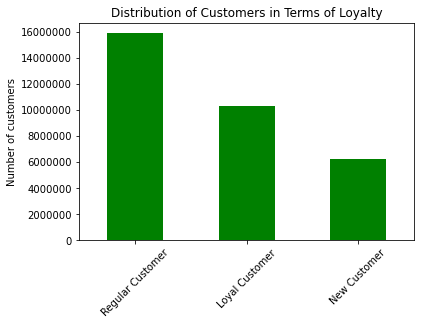

In [88]:
# Create a bar chart for the loyalty_flag column
bar2 = df_ords_prods_merge['loyalty_flag'].value_counts().plot.bar(
    color = ['green'],
    title = "Distribution of Customers in Terms of Loyalty",
    ylabel = "Number of customers")
bar2.ticklabel_format(useOffset=False, style='plain', axis='y')
bar2.tick_params(axis='x', rotation=45)

#### The bar chart shows that regular customers make up the largest group, followed by loyal customers and new customers.

In [134]:
# Export bar object created in previous step
bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '06-bar_loyalty_flag.png'), bbox_inches='tight')

# 09 Create a line chart showing expenditure vs hour of day

In [136]:
# Reduce samples to only columns needed for the chart (to speed up)
df_3 = small[['order_hour_of_day', 'prices']]
df_3.tail(10)

,order_hour_of_day,prices
32432997,20,2.8
32433002,16,8.7
32433005,7,10.2
32433007,20,10.3
32433008,16,2.6
32433009,13,2.6
32433015,9,3.7
32433018,13,3.7
32433020,10,3.7
32433028,5,6.9


[[<matplotlib.axis.XTick at 0x13e4dde8100>,

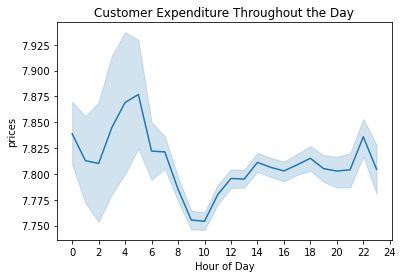

In [139]:
# Create line chart of small dataframe
line2 = sns.lineplot(
    data = df_3,
    x = 'order_hour_of_day',
    y = 'prices')
line2.set(title='Customer Expenditure Throughout the Day', xlabel='Hour of Day')
line2.set(xticks=[0,2,4,6,8,10,12,14,16,18,20,22,24])

#### This chart shows that the most money is spent on orders placed between midnight (0) and 10am, and especially between ~3 and 6 am.

In [141]:
# Export line object created previously
line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '07-line_prices_hour_of_day.png'))